In [3]:
import numpy as np
import time
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


class Perceptron:

    def __init__(self,  lr, epochs):
        
        self.lr = lr
        self.epochs = epochs

    def mse(self,predictions, targets):
        
        samples_num = len(predictions)
        
        accumulated_error = 0.0
        for prediction, target in zip(predictions, targets):
            accumulated_error += (prediction - target)**2
            
        mae_error = (1.0 / (2*samples_num)) * accumulated_error
        
        return mae_error

    def Training(self,inputs, outputs):
        self.inputs = np.array(inputs)
        self.outputs = np.array(outputs)


        epoch_count = 0
        self.errors_ = []
        t_0 = time.time()

        bias = -np.ones((len(self.inputs),1))

        inputs = np.concatenate([self.inputs, bias], axis=1)
        
        self.w_0 = np.random.randn(3,1)
        cost=1
        for i in range(self.epochs):
            
            y = np.zeros((len(inputs),1))
            a = inputs@self.w_0
            
            count = 0
            
            for l in a:
               
                if l > 0: y[count][0] = 1
                else: y[count][0] = 0
                count+=1
            diff = self.outputs - y
            
            dot = diff.T@inputs
            
            self.w_0 += self.lr*dot.T
            

            cost = self.mse(y,outputs)
            
            self.errors_.append(cost)

            print("Epoch: ", i)
            print("Target:      Predicted:")
            for k in range(len(y)):
                achieved = '     ' + str(outputs[k]) + '-----------' + str(y[k])
                print(achieved)
            print("Weights: ")
            
            for l in range(len(self.w_0)):
                wei = 'W' + str(l) + ' = ' + str(self.w_0[l])
                print(wei)
            print("Cost = ", cost)
            print("")
            if cost < 0.05: break
            epoch_count += 1
            
        
        t_1 = time.time()
        t_f = t_1 - t_0
        
        print("Required time = ",t_f)
        print("Required epochs = ", epoch_count)

        plt.plot(range(1, len(self.errors_) + 1), self.errors_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost values')

        plt.tight_layout()
        
        plt.show()

    def plot_decision_regions(self):
       
        x = np.hsplit(self.inputs,len(self.inputs[1]))
      
        plt.scatter(x[1],x[0],label="Inputs",marker='o')
        
        xx = np.arange(-1,3,0.1)
        yy = []
        
        yy = (-self.w_0[1]/self.w_0[0])*xx - (self.w_0[2]/self.w_0[0])*-1
        
        plt.plot(xx,yy,label='Decision boundarie',color='r')

        plt.xlabel('First input')
        plt.ylabel('Second input')
        plt.legend(loc='best')
        plt.axis([-0.5, 2, -0.5, 2])
        plt.tight_layout()
        plt.grid()
        
        plt.show()
        
    def logic_gate_dataset(self,logic_gate):
        inputs = [
            [0,0],
            [0,0],
            [0,1],
            [0,1],
            [1,0],
            [1,0],
            [1,1],
            [1,1]
            ]
        outputs = [[0],[1],[0],[1],[0],[1],[0],[1]]

        if logic_gate == 'and':
            index = [1,3,5,6]
            l=0
            for i in index:
                inputs=np.delete(inputs, i-l, 0)
                outputs=np.delete(outputs,i-l,0)
                l+=1
        elif logic_gate == 'or':
            index = [1,2,4,6]
            l=0
            for i in index:
                inputs=np.delete(inputs, i-l, 0)
                outputs=np.delete(outputs,i-l,0)
                l+=1
        elif logic_gate == 'nand':
            index = [0,2,4,7]
            l=0
            for i in index:
                inputs=np.delete(inputs, i-l, 0)
                outputs=np.delete(outputs,i-l,0)
                l+=1
        elif logic_gate == 'nor':
            index = [0,3,5,7]
            l=0
            for i in index:
                inputs=np.delete(inputs, i-l, 0)
                outputs=np.delete(outputs,i-l,0)
                l+=1    
        return inputs,outputs


Epoch:  0
Target:      Predicted:
     [1]-----------[0.]
     [1]-----------[0.]
     [1]-----------[0.]
     [0]-----------[0.]
Weights: 
W0 = [-0.84674133]
W1 = [-0.94910148]
W2 = [0.06938637]
Cost =  [0.375]

Epoch:  1
Target:      Predicted:
     [1]-----------[0.]
     [1]-----------[0.]
     [1]-----------[0.]
     [0]-----------[0.]
Weights: 
W0 = [-0.34674133]
W1 = [-0.44910148]
W2 = [-1.43061363]
Cost =  [0.375]

Epoch:  2
Target:      Predicted:
     [1]-----------[1.]
     [1]-----------[1.]
     [1]-----------[1.]
     [0]-----------[1.]
Weights: 
W0 = [-0.84674133]
W1 = [-0.94910148]
W2 = [-0.93061363]
Cost =  [0.125]

Epoch:  3
Target:      Predicted:
     [1]-----------[1.]
     [1]-----------[0.]
     [1]-----------[1.]
     [0]-----------[0.]
Weights: 
W0 = [-0.84674133]
W1 = [-0.44910148]
W2 = [-1.43061363]
Cost =  [0.125]

Epoch:  4
Target:      Predicted:
     [1]-----------[1.]
     [1]-----------[1.]
     [1]-----------[1.]
     [0]-----------[1.]
Weights: 
W0 = 

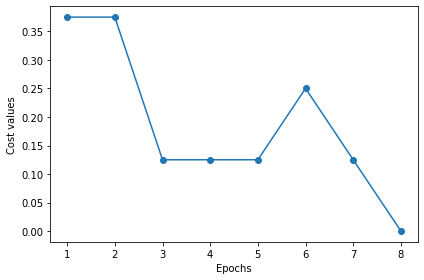

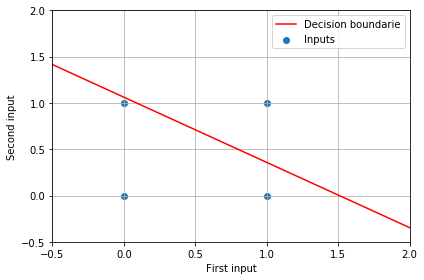

In [4]:


ppn = Perceptron(0.5,50)
inputs, outputs = ppn.logic_gate_dataset('nand')
ppn.Training(inputs, outputs)
ppn.plot_decision_regions()
